In [ ]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=6ff6f630-a911-4d66-ac07-207695f4de65
To: /content/midterm_folder/test_transaction.csv
100% 613M/613M [00:09<00:00, 66.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA
From (redirected): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA&confirm=t&uuid=e6175ef0-2312-40d7-a6b4-438ac5964ca6
To: /content/midterm_folder/train_transaction.csv
100% 683M/683M [00:14<00:00, 47.2MB/s]
Download completed


In [ ]:
import pandas as pd
import polars as pl

BASE_PATH = "midterm_folder"

train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

print(train_transaction.shape) #590540 row dan 393 feature + 1 target
print(test_transaction.shape) #506691 row dan 393 feature

(590540, 394)
(506691, 393)


In [ ]:
train_transaction.head() #isFraud adalah target featurenya

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3663549,18403224,31.95,"""W""",10409,111.0,150.0,"""visa""",226.0,"""debit""",170.0,87.0,1.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,null,null,…,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663550,18403263,49.0,"""W""",4272,111.0,150.0,"""visa""",226.0,"""debit""",299.0,87.0,4.0,null,"""aol.com""",null,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,null,null,…,0.0,0.0,1.0,0.0,280.0,77.0,0.0,280.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663551,18403310,171.0,"""W""",4476,574.0,150.0,"""visa""",226.0,"""debit""",472.0,87.0,2635.0,null,"""hotmail.com""",null,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,null,null,…,0.0,0.0,1.0,0.0,1321.0,0.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663552,18403310,284.95,"""W""",10989,360.0,150.0,"""visa""",166.0,"""debit""",205.0,87.0,17.0,null,"""gmail.com""",null,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663553,18403317,67.95,"""W""",18018,452.0,150.0,"""mastercard""",117.0,"""debit""",264.0,87.0,6.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,null,null,…,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


# Task
Examine the data types, check for missing values, and display descriptive statistics for both `train_transaction` and `test_transaction` dataframes to gain a foundational understanding of the datasets.

## Initial Data Inspection

### Subtask:
Examine the data types, check for missing values, and display descriptive statistics for both `train_transaction` and `test_transaction` dataframes to gain a foundational understanding of the datasets.


**Reasoning**:
First, I will display the data types of each column in the `train_transaction` DataFrame to understand the structure of the data.



In [ ]:
print("Data types for train_transaction:")
print(train_transaction.schema)

Data types for train_transaction:
Schema({'TransactionID': Int64, 'isFraud': Int64, 'TransactionDT': Int64, 'TransactionAmt': Float64, 'ProductCD': String, 'card1': Int64, 'card2': Float64, 'card3': Float64, 'card4': String, 'card5': Float64, 'card6': String, 'addr1': Float64, 'addr2': Float64, 'dist1': Float64, 'dist2': Float64, 'P_emaildomain': String, 'R_emaildomain': String, 'C1': Float64, 'C2': Float64, 'C3': Float64, 'C4': Float64, 'C5': Float64, 'C6': Float64, 'C7': Float64, 'C8': Float64, 'C9': Float64, 'C10': Float64, 'C11': Float64, 'C12': Float64, 'C13': Float64, 'C14': Float64, 'D1': Float64, 'D2': Float64, 'D3': Float64, 'D4': Float64, 'D5': Float64, 'D6': Float64, 'D7': Float64, 'D8': Float64, 'D9': Float64, 'D10': Float64, 'D11': Float64, 'D12': Float64, 'D13': Float64, 'D14': Float64, 'D15': Float64, 'M1': String, 'M2': String, 'M3': String, 'M4': String, 'M5': String, 'M6': String, 'M7': String, 'M8': String, 'M9': String, 'V1': Float64, 'V2': Float64, 'V3': Float64, '

**Reasoning**:
Now, I will calculate and display the number of missing values for each column in the `train_transaction` DataFrame to understand data completeness.



In [ ]:
print("Missing values for train_transaction:")
print(train_transaction.null_count())


Missing values for train_transaction:
shape: (1, 394)
┌───────────────┬─────────┬───────────────┬────────────────┬───┬────────┬────────┬────────┬────────┐
│ TransactionID ┆ isFraud ┆ TransactionDT ┆ TransactionAmt ┆ … ┆ V336   ┆ V337   ┆ V338   ┆ V339   │
│ ---           ┆ ---     ┆ ---           ┆ ---            ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ u32           ┆ u32     ┆ u32           ┆ u32            ┆   ┆ u32    ┆ u32    ┆ u32    ┆ u32    │
╞═══════════════╪═════════╪═══════════════╪════════════════╪═══╪════════╪════════╪════════╪════════╡
│ 0             ┆ 0       ┆ 0             ┆ 0              ┆ … ┆ 508189 ┆ 508189 ┆ 508189 ┆ 508189 │
└───────────────┴─────────┴───────────────┴────────────────┴───┴────────┴────────┴────────┴────────┘


**Reasoning**:
Next, I will display the descriptive statistics of the numerical columns in the `train_transaction` DataFrame to understand the distribution and central tendencies of the data.



In [ ]:
print("Descriptive statistics for train_transaction:")
print(train_transaction.describe())

Descriptive statistics for train_transaction:
shape: (9, 395)
┌───────────┬───────────┬──────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ statistic ┆ Transacti ┆ isFraud  ┆ Transacti ┆ … ┆ V336      ┆ V337      ┆ V338      ┆ V339      │
│ ---       ┆ onID      ┆ ---      ┆ onDT      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│ str       ┆ ---       ┆ f64      ┆ ---       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
│           ┆ f64       ┆          ┆ f64       ┆   ┆           ┆           ┆           ┆           │
╞═══════════╪═══════════╪══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count     ┆ 590540.0  ┆ 590540.0 ┆ 590540.0  ┆ … ┆ 82351.0   ┆ 82351.0   ┆ 82351.0   ┆ 82351.0   │
│ null_coun ┆ 0.0       ┆ 0.0      ┆ 0.0       ┆ … ┆ 508189.0  ┆ 508189.0  ┆ 508189.0  ┆ 508189.0  │
│ t         ┆           ┆          ┆           ┆   ┆           ┆           ┆           ┆           │
│ mean      ┆ 3282269.5 ┆ 0.0

**Reasoning**:
Now, I will display the data types of each column in the `test_transaction` DataFrame to understand its structure, similar to what was done for `train_transaction`.



In [ ]:
print("Data types for test_transaction:")
print(test_transaction.schema)

Data types for test_transaction:
Schema({'TransactionID': Int64, 'TransactionDT': Int64, 'TransactionAmt': Float64, 'ProductCD': String, 'card1': Int64, 'card2': Float64, 'card3': Float64, 'card4': String, 'card5': Float64, 'card6': String, 'addr1': Float64, 'addr2': Float64, 'dist1': Float64, 'dist2': Float64, 'P_emaildomain': String, 'R_emaildomain': String, 'C1': Float64, 'C2': Float64, 'C3': Float64, 'C4': Float64, 'C5': Float64, 'C6': Float64, 'C7': Float64, 'C8': Float64, 'C9': Float64, 'C10': Float64, 'C11': Float64, 'C12': Float64, 'C13': Float64, 'C14': Float64, 'D1': Float64, 'D2': Float64, 'D3': Float64, 'D4': Float64, 'D5': Float64, 'D6': Float64, 'D7': Float64, 'D8': Float64, 'D9': Float64, 'D10': Float64, 'D11': Float64, 'D12': Float64, 'D13': Float64, 'D14': Float64, 'D15': Float64, 'M1': String, 'M2': String, 'M3': String, 'M4': String, 'M5': String, 'M6': String, 'M7': String, 'M8': String, 'M9': String, 'V1': Float64, 'V2': Float64, 'V3': Float64, 'V4': Float64, 'V5':

**Reasoning**:
Now, I will calculate and display the number of missing values for each column in the `test_transaction` DataFrame to understand data completeness.



In [ ]:
print("Missing values for test_transaction:")
print(test_transaction.null_count())

Missing values for test_transaction:
shape: (1, 393)
┌───────────────┬───────────────┬──────────────┬───────────┬───┬────────┬────────┬────────┬────────┐
│ TransactionID ┆ TransactionDT ┆ TransactionA ┆ ProductCD ┆ … ┆ V336   ┆ V337   ┆ V338   ┆ V339   │
│ ---           ┆ ---           ┆ mt           ┆ ---       ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ u32           ┆ u32           ┆ ---          ┆ u32       ┆   ┆ u32    ┆ u32    ┆ u32    ┆ u32    │
│               ┆               ┆ u32          ┆           ┆   ┆        ┆        ┆        ┆        │
╞═══════════════╪═══════════════╪══════════════╪═══════════╪═══╪════════╪════════╪════════╪════════╡
│ 0             ┆ 0             ┆ 0            ┆ 0         ┆ … ┆ 430260 ┆ 430260 ┆ 430260 ┆ 430260 │
└───────────────┴───────────────┴──────────────┴───────────┴───┴────────┴────────┴────────┴────────┘


**Reasoning**:
Finally, I will display the descriptive statistics of the numerical columns in the `test_transaction` DataFrame to understand the distribution and central tendencies of the data, completing all required inspection steps for both dataframes.



In [ ]:
print("Descriptive statistics for test_transaction:")
print(test_transaction.describe())

Descriptive statistics for test_transaction:
shape: (9, 394)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Transacti ┆ Transacti ┆ Transacti ┆ … ┆ V336      ┆ V337      ┆ V338      ┆ V339     │
│ ---       ┆ onID      ┆ onDT      ┆ onAmt     ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
│           ┆ f64       ┆ f64       ┆ f64       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 506691.0  ┆ 506691.0  ┆ 506691.0  ┆ … ┆ 76431.0   ┆ 76431.0   ┆ 76431.0   ┆ 76431.0  │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 430260.0  ┆ 430260.0  ┆ 430260.0  ┆ 430260.0 │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ 3.916894e ┆ 2.69

## Analyze Target Variable

### Subtask:
Analyze the distribution of the `isFraud` target variable in `train_transaction` to understand its balance and characteristics. A bar chart will be generated to visualize this distribution.


**Reasoning**:
First, I will print the value counts of the `isFraud` column in the `train_transaction` DataFrame to numerically understand its distribution.



In [ ]:
print("Value counts for 'isFraud' in train_transaction:")
print(train_transaction["isFraud"].value_counts())

Value counts for 'isFraud' in train_transaction:
shape: (2, 2)
┌─────────┬────────┐
│ isFraud ┆ count  │
│ ---     ┆ ---    │
│ i64     ┆ u32    │
╞═════════╪════════╡
│ 1       ┆ 20663  │
│ 0       ┆ 569877 │
└─────────┴────────┘


**Reasoning**:
Next, I will import the `matplotlib.pyplot` module to enable plotting functionalities for visualizing the distribution of the target variable.



In [ ]:
import matplotlib.pyplot as plt

**Reasoning**:
Now, I will create a bar chart to visualize the distribution of the `isFraud` target variable, adding appropriate labels and a title for clarity.



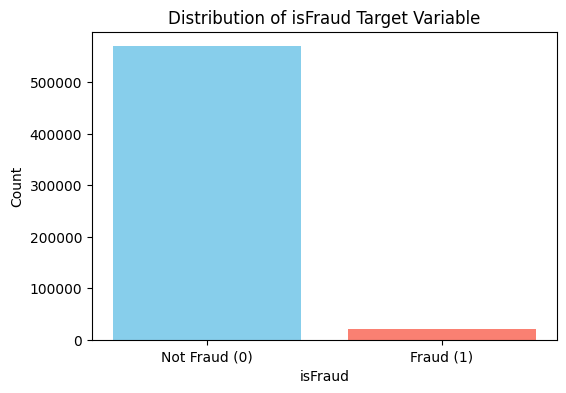

In [ ]:
fraud_counts = train_transaction["isFraud"].value_counts().sort("isFraud")

plt.figure(figsize=(6, 4))
plt.bar(fraud_counts["isFraud"].to_numpy(), fraud_counts["count"].to_numpy(), color=['skyblue', 'salmon'])
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.title('Distribution of isFraud Target Variable')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.show()

## Identify Feature Types

### Subtask:
Automatically identify and separate numerical and categorical features in both datasets to facilitate subsequent analysis and preprocessing steps.


**Reasoning**:
First, I will initialize empty lists for numerical and categorical column names for the `train_transaction` DataFrame and then iterate through its schema to categorize each column based on its Polars data type (Float64 or Int64 for numerical, String for categorical).



In [ ]:


train_numerical_cols = []
train_categorical_cols = []

for col_name, dtype in train_transaction.schema.items():
    if dtype == pl.Float64 or dtype == pl.Int64:
        train_numerical_cols.append(col_name)
    elif dtype == pl.String:
        train_categorical_cols.append(col_name)

print("Train Numerical Columns:", train_numerical_cols)
print("Train Categorical Columns:", train_categorical_cols)

Train Numerical Columns: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95'

**Reasoning**:
Now, I will initialize empty lists for numerical and categorical column names for the `test_transaction` DataFrame and then iterate through its schema to categorize each column based on its Polars data type, similar to the process for `train_transaction`.



In [ ]:
test_numerical_cols = []
test_categorical_cols = []

for col_name, dtype in test_transaction.schema.items():
    if dtype == pl.Float64 or dtype == pl.Int64:
        test_numerical_cols.append(col_name)
    elif dtype == pl.String:
        test_categorical_cols.append(col_name)

print("Test Numerical Columns:", test_numerical_cols)
print("Test Categorical Columns:", test_categorical_cols)

Test Numerical Columns: ['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V9

## Univariate Analysis of Numerical Features

### Subtask:
Visualize the distributions of key numerical features using histograms or box plots to identify outliers, skewness, and general patterns. Include a legend for all visualizations.


**Reasoning**:
First, I will import the `seaborn` library to enable advanced plotting capabilities for visualizing the distributions of numerical features.



In [ ]:
import seaborn as sns
print("Seaborn imported successfully.")

Seaborn imported successfully.


**Reasoning**:
I will now select a few key numerical features from `train_numerical_cols` and visualize their distributions using both histograms and box plots to understand their patterns, outliers, and skewness, as requested by the subtask.



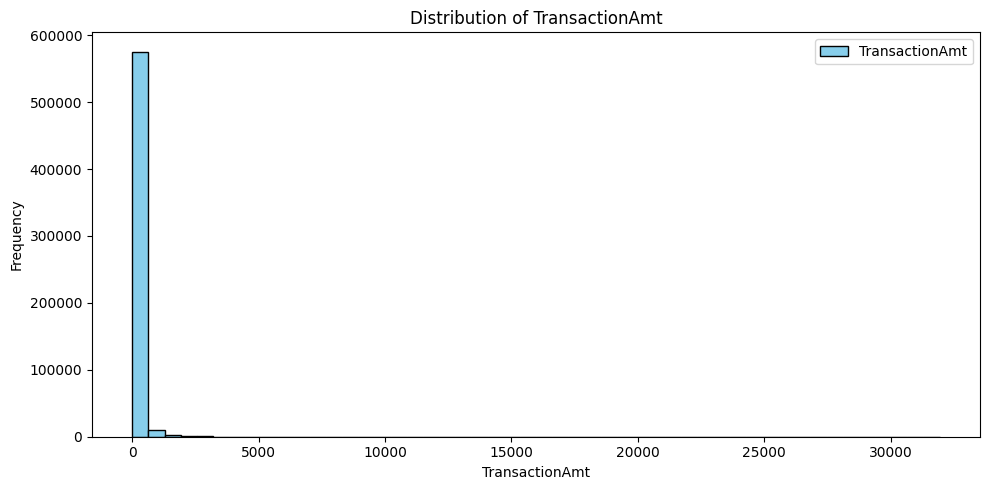

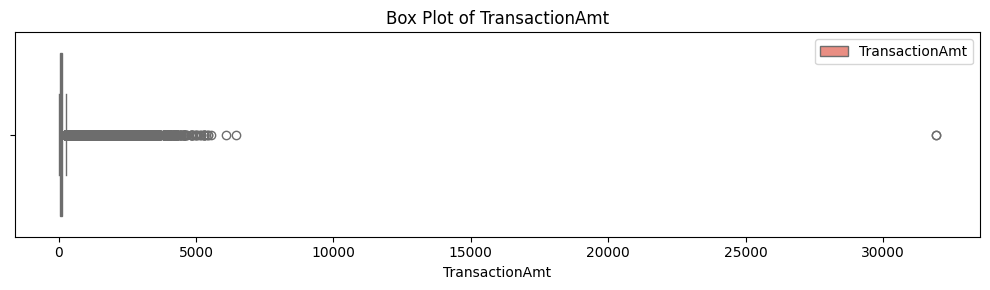

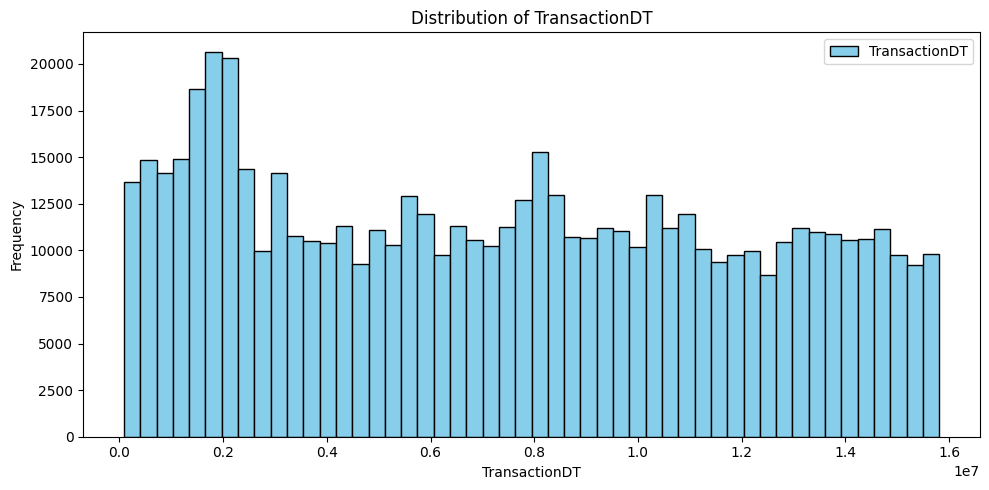

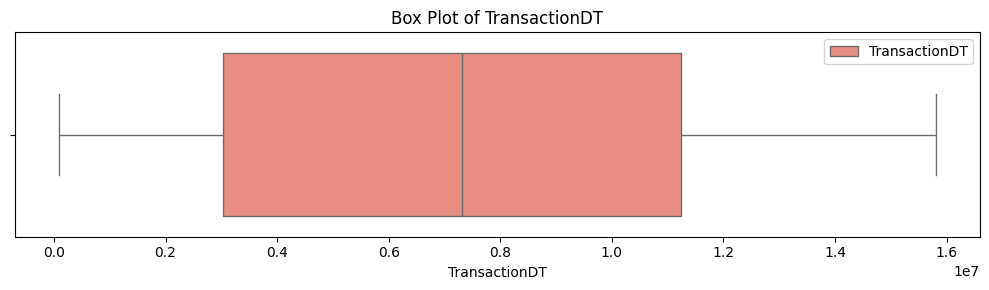

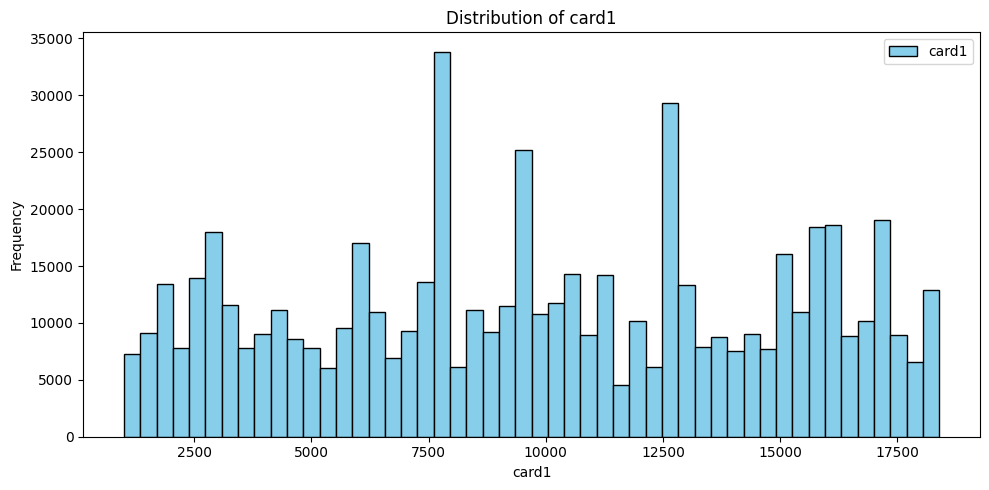

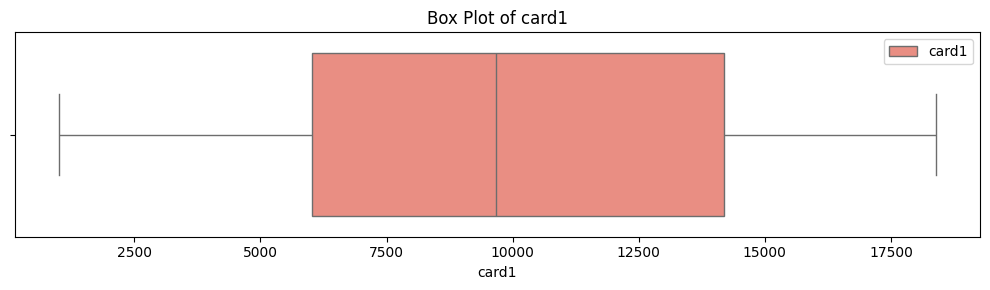

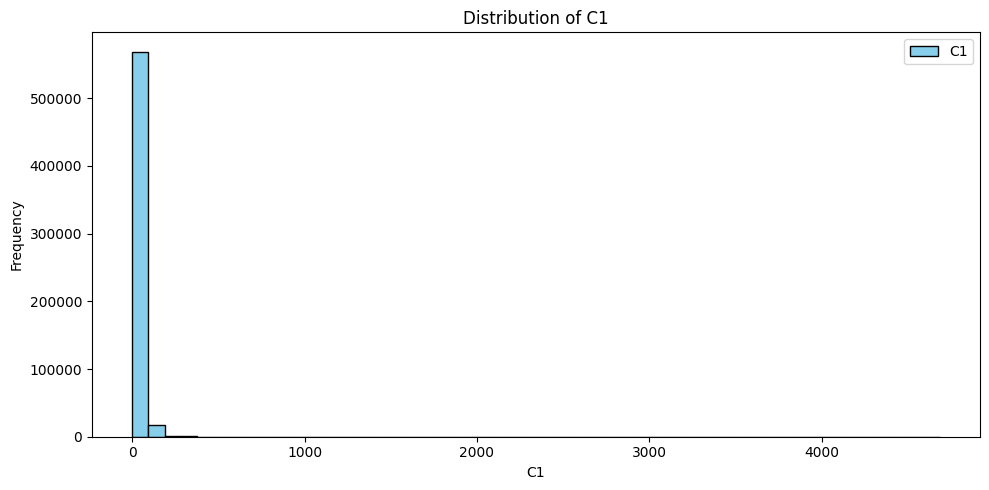

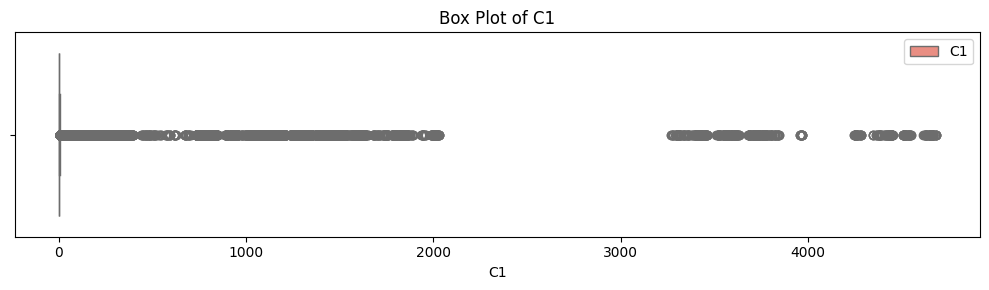

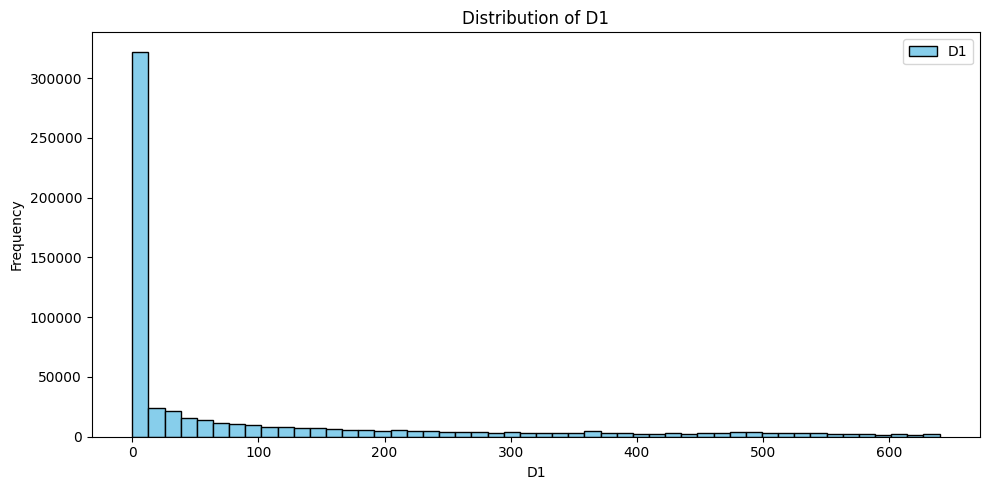

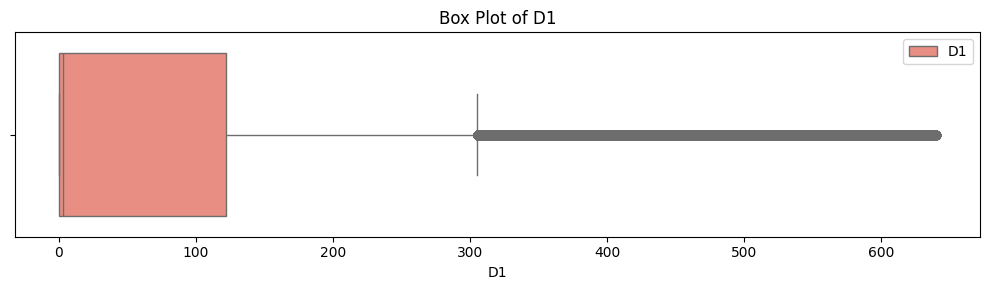

In [ ]:
key_numerical_features = ['TransactionAmt', 'TransactionDT', 'card1', 'C1', 'D1']

for feature in key_numerical_features:
    # Histogram
    plt.figure(figsize=(10, 5))
    plt.hist(train_transaction[feature].to_numpy(), bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend([feature]) # Legend for the histogram
    plt.tight_layout()
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=train_transaction[feature].to_numpy(), color='salmon')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.legend([feature]) # Legend for the box plot
    plt.tight_layout()
    plt.show()

## Univariate Analysis of Categorical Features

### Subtask:
Visualize the distributions of key categorical features using bar plots to understand their unique values and frequencies. Include a legend for all visualizations.


**Reasoning**:
I will select key categorical features from `train_categorical_cols` and visualize their distributions using bar plots, displaying unique values and their frequencies, as per the subtask instructions.



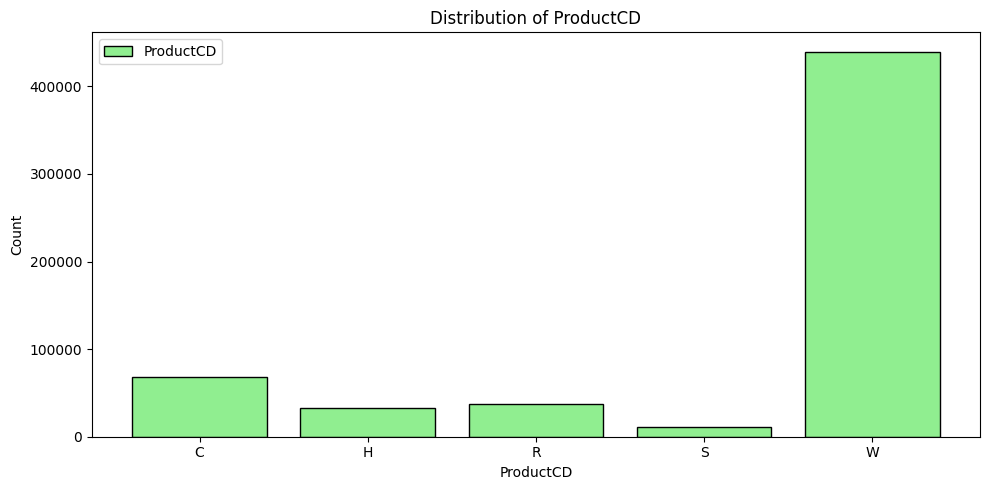

TypeError: 'value' must be an instance of str or bytes, not a None

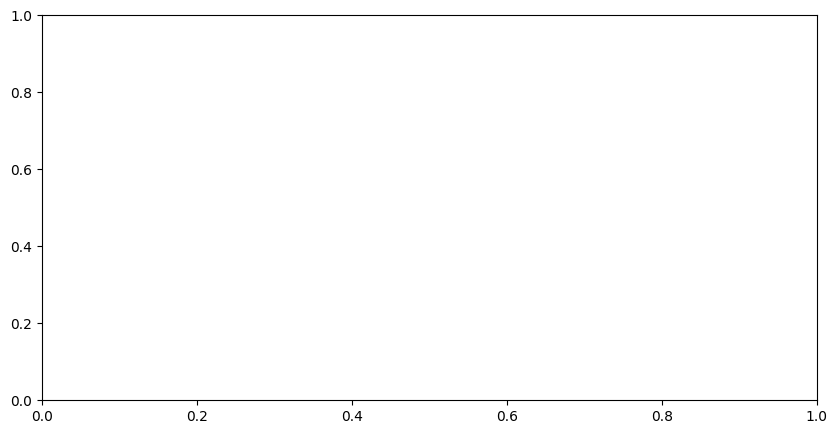

In [ ]:
key_categorical_features = ['ProductCD', 'card4', 'card6']

for feature in key_categorical_features:
    # Calculate value counts
    category_counts = train_transaction[feature].value_counts().sort(feature)

    # Create bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(category_counts[feature].to_numpy(), category_counts["count"].to_numpy(), color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend([feature]) # Legend for the bar plot
    plt.tight_layout()
    plt.show()

**Reasoning**:
The previous code failed because `matplotlib.pyplot.bar` cannot handle `None` values when plotting categorical data, which arose from null values in the 'card4' column of the Polars DataFrame. To fix this, I will replace any null values in the categorical feature column of the value counts with the string 'Unknown' before plotting.



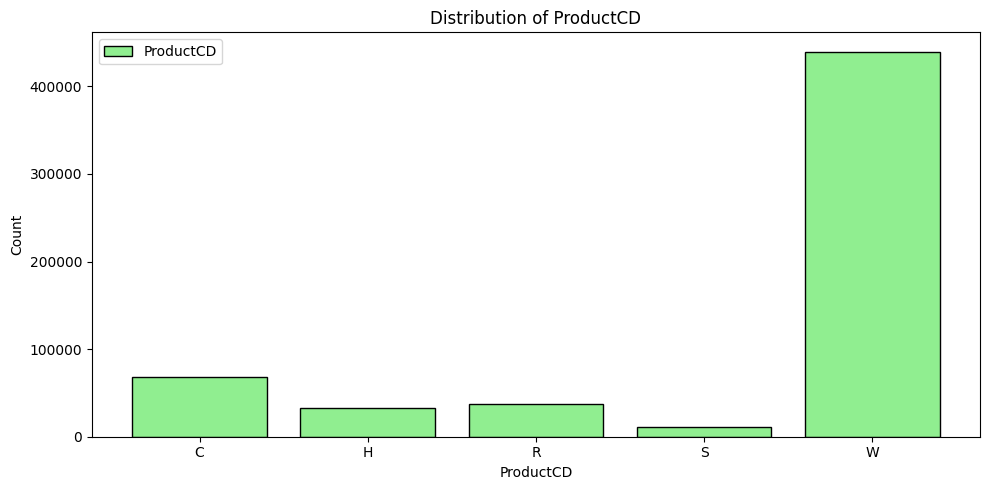

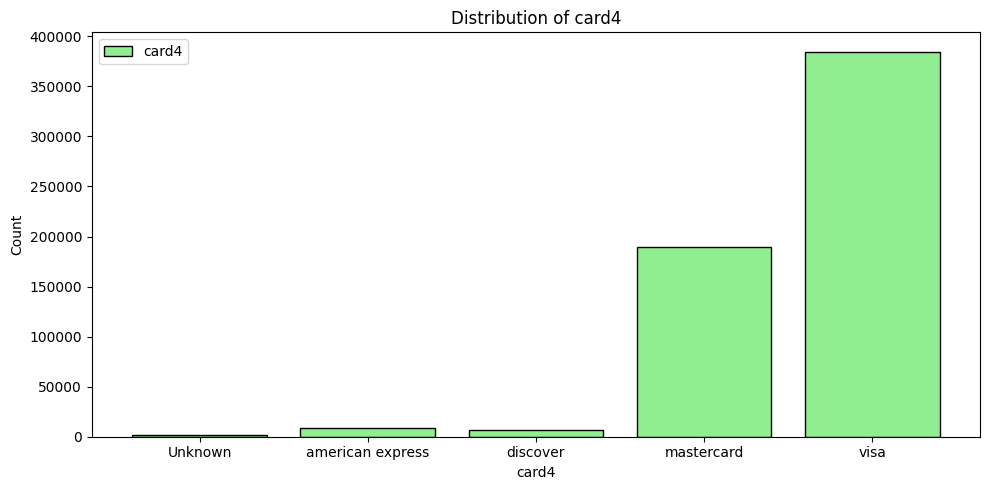

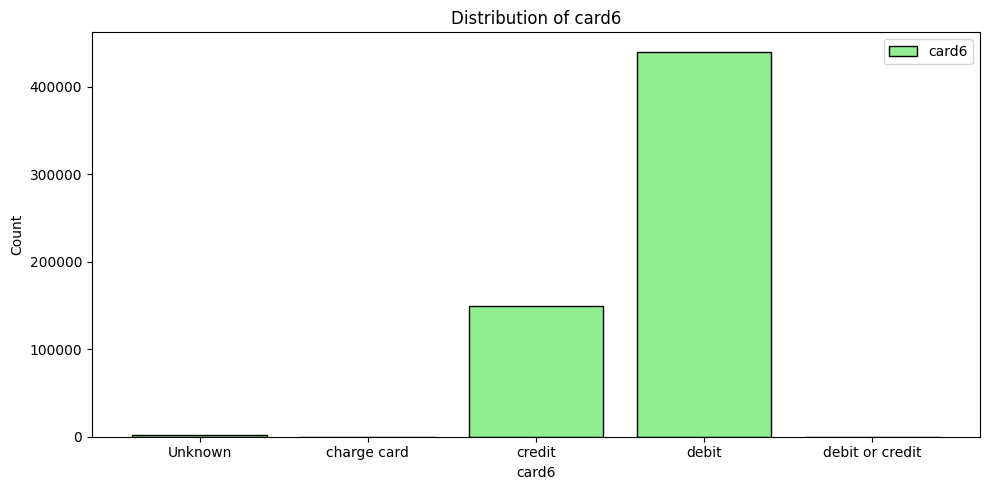

In [ ]:
key_categorical_features = ['ProductCD', 'card4', 'card6']

for feature in key_categorical_features:
    # Calculate value counts
    category_counts = train_transaction[feature].value_counts().sort(feature)

    # Replace nulls in the feature column for plotting purposes
    category_counts = category_counts.with_columns(
        pl.col(feature).fill_null(pl.lit("Unknown")).alias(feature)
    )

    # Create bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(category_counts[feature].to_numpy(), category_counts["count"].to_numpy(), color='lightgreen', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend([feature]) # Legend for the bar plot
    plt.tight_layout()
    plt.show()

## Bivariate Analysis (Features vs. Target)

### Subtask:
Explore relationships between selected features and the `isFraud` target variable. This may involve correlation matrices for numerical features and grouped bar charts or stacked bar charts for categorical features. Include a legend for all visualizations.


**Reasoning**:
I will start by creating a list of the key numerical features along with the 'isFraud' target variable as specified in the instructions to prepare for correlation analysis.



In [ ]:
selected_numerical_features = ['TransactionAmt', 'TransactionDT', 'card1', 'C1', 'D1', 'isFraud']
print("Selected numerical features for correlation analysis:", selected_numerical_features)

Selected numerical features for correlation analysis: ['TransactionAmt', 'TransactionDT', 'card1', 'C1', 'D1', 'isFraud']


**Reasoning**:
Now, I will calculate the correlation matrix for the selected numerical features in `train_transaction` and then visualize it using a heatmap to understand their relationships, including with the 'isFraud' target variable.



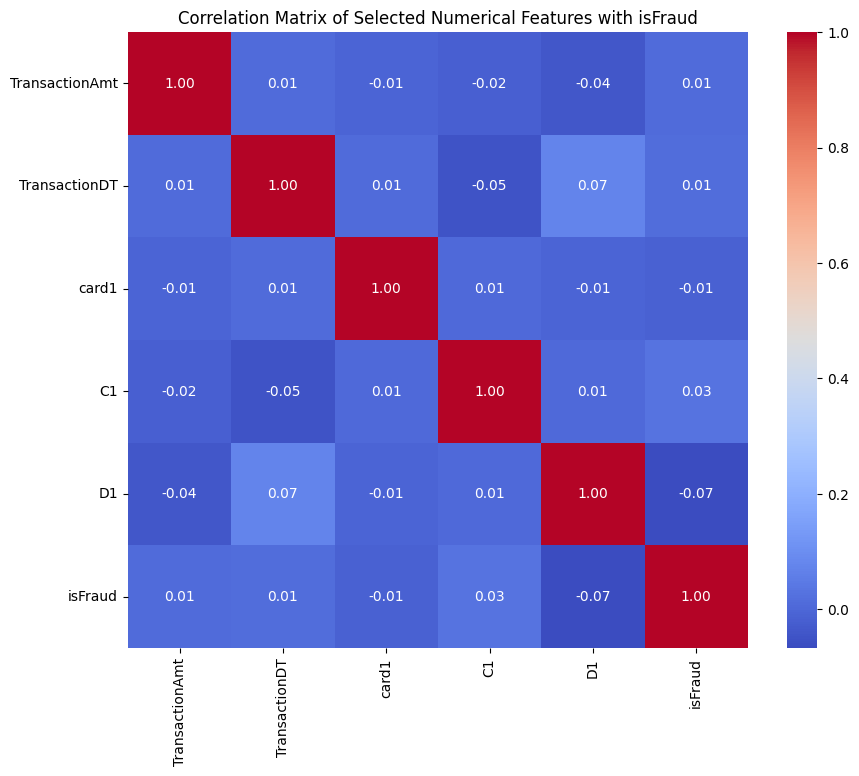

In [ ]:
correlation_matrix = train_transaction[selected_numerical_features].to_pandas().corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Numerical Features with isFraud')
plt.show()

**Reasoning**:
Next, I will select the key categorical features, 'ProductCD', 'card4', and 'card6', from the `train_transaction` DataFrame as instructed, to prepare for visualizing their relationships with the 'isFraud' target variable.



In [ ]:
selected_categorical_features = ['ProductCD', 'card4', 'card6']
print("Selected categorical features for analysis:", selected_categorical_features)

Selected categorical features for analysis: ['ProductCD', 'card4', 'card6']


**Reasoning**:
Now, for each selected categorical feature, I will create a grouped bar chart to visualize the distribution of 'isFraud' across its categories, handling null values by replacing them with 'Unknown' to ensure proper plotting.



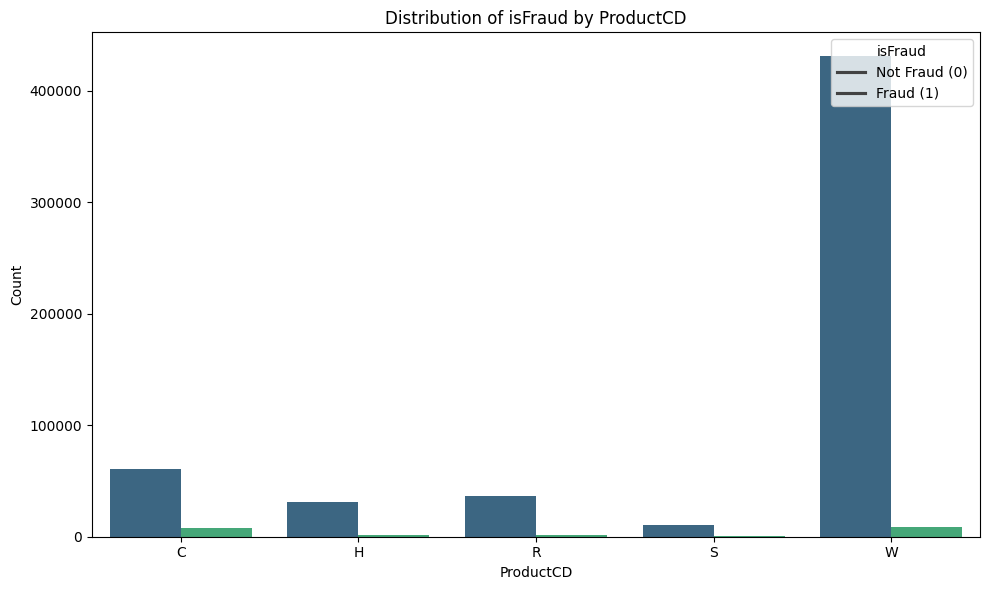

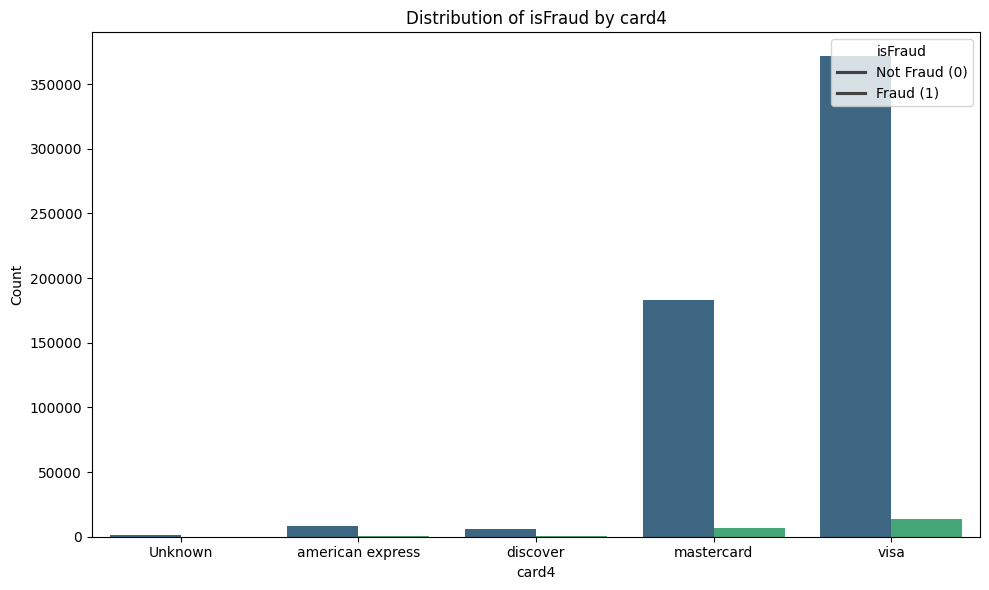

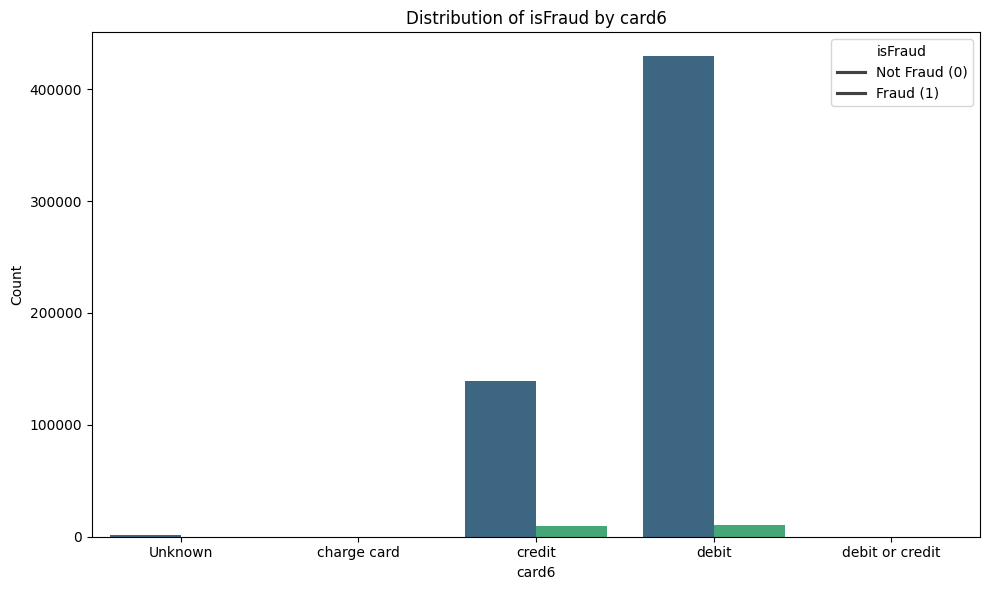

In [ ]:
for feature in selected_categorical_features:
    # Group by feature and isFraud, then count occurrences
    grouped_data = train_transaction.group_by([feature, 'isFraud']).len().sort([feature, 'isFraud'])

    # Handle nulls in the feature column for plotting purposes
    grouped_data = grouped_data.with_columns(
        pl.col(feature).fill_null(pl.lit("Unknown")).alias(feature)
    )

    # Convert to Pandas DataFrame for easier plotting with Seaborn
    df_plot = grouped_data.to_pandas()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_plot, x=feature, y='len', hue='isFraud', palette='viridis')
    plt.title(f'Distribution of isFraud by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='isFraud', labels=['Not Fraud (0)', 'Fraud (1)'], loc='upper right')
    plt.tight_layout()
    plt.show()

## Handle Missing Values

### Subtask:
Implement a strategy to address missing values. This could involve imputation (e.g., mean, median, mode) or removal of columns/rows, depending on the extent and nature of missingness observed during EDA.


**Reasoning**:
First, I will identify all numerical columns in `train_transaction` that have missing values and calculate their median. This step combines identifying missing numerical columns and calculating their medians from the training data, which will be used for imputation in both dataframes.



In [ ]:
numerical_cols_with_missing_train = []
median_imputation_values = {}

for col in train_numerical_cols:
    if train_transaction[col].null_count() > 0:
        numerical_cols_with_missing_train.append(col)
        median_val = train_transaction[col].median()
        median_imputation_values[col] = median_val

print("Numerical columns in train_transaction with missing values:", numerical_cols_with_missing_train)
print("Median imputation values from train_transaction:", median_imputation_values)

Numerical columns in train_transaction with missing values: ['card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 

**Reasoning**:
Now that the median imputation values for numerical columns in `train_transaction` have been calculated, I will use these values to impute missing numerical values in both the `train_transaction` and `test_transaction` DataFrames. This ensures consistency and prevents data leakage from the test set.



In [ ]:
print("Imputing missing numerical values in train_transaction...")
for col, median_val in median_imputation_values.items():
    train_transaction = train_transaction.with_columns(
        pl.col(col).fill_null(median_val)
    )

print("Imputing missing numerical values in test_transaction...")
for col, median_val in median_imputation_values.items():
    # Only impute if the column exists in test_transaction
    if col in test_transaction.columns:
        test_transaction = test_transaction.with_columns(
            pl.col(col).fill_null(median_val)
        )

print("Missing numerical values in train_transaction after imputation:")
# Filter to only check columns that had missing values initially
print(train_transaction.select(numerical_cols_with_missing_train).null_count())

print("Missing numerical values in test_transaction after imputation:")
# Filter to only check columns that had missing values initially and exist in test_transaction
missing_in_test_after_imputation_cols = [col for col in numerical_cols_with_missing_train if col in test_transaction.columns]
print(test_transaction.select(missing_in_test_after_imputation_cols).null_count())

Imputing missing numerical values in train_transaction...
Imputing missing numerical values in test_transaction...
Missing numerical values in train_transaction after imputation:
shape: (1, 361)
┌───────┬───────┬───────┬───────┬───┬──────┬──────┬──────┬──────┐
│ card2 ┆ card3 ┆ card5 ┆ addr1 ┆ … ┆ V336 ┆ V337 ┆ V338 ┆ V339 │
│ ---   ┆ ---   ┆ ---   ┆ ---   ┆   ┆ ---  ┆ ---  ┆ ---  ┆ ---  │
│ u32   ┆ u32   ┆ u32   ┆ u32   ┆   ┆ u32  ┆ u32  ┆ u32  ┆ u32  │
╞═══════╪═══════╪═══════╪═══════╪═══╪══════╪══════╪══════╪══════╡
│ 0     ┆ 0     ┆ 0     ┆ 0     ┆ … ┆ 0    ┆ 0    ┆ 0    ┆ 0    │
└───────┴───────┴───────┴───────┴───┴──────┴──────┴──────┴──────┘
Missing numerical values in test_transaction after imputation:
shape: (1, 361)
┌───────┬───────┬───────┬───────┬───┬──────┬──────┬──────┬──────┐
│ card2 ┆ card3 ┆ card5 ┆ addr1 ┆ … ┆ V336 ┆ V337 ┆ V338 ┆ V339 │
│ ---   ┆ ---   ┆ ---   ┆ ---   ┆   ┆ ---  ┆ ---  ┆ ---  ┆ ---  │
│ u32   ┆ u32   ┆ u32   ┆ u32   ┆   ┆ u32  ┆ u32  ┆ u32  ┆ u32  │


**Reasoning**:
I will identify all categorical columns in `train_transaction` and `test_transaction` that have missing values and then impute these missing values with the string 'Unknown' to complete the missing value handling for categorical features.



In [ ]:
categorical_cols_with_missing_train = []
for col in train_categorical_cols:
    if train_transaction[col].null_count() > 0:
        categorical_cols_with_missing_train.append(col)

categorical_cols_with_missing_test = []
for col in test_categorical_cols:
    if test_transaction[col].null_count() > 0:
        categorical_cols_with_missing_test.append(col)

print("Categorical columns in train_transaction with missing values:", categorical_cols_with_missing_train)
print("Categorical columns in test_transaction with missing values:", categorical_cols_with_missing_test)

print("Imputing missing categorical values in train_transaction with 'Unknown'...")
for col in categorical_cols_with_missing_train:
    train_transaction = train_transaction.with_columns(
        pl.col(col).fill_null(pl.lit("Unknown"))
    )

print("Imputing missing categorical values in test_transaction with 'Unknown'...")
for col in categorical_cols_with_missing_test:
    test_transaction = test_transaction.with_columns(
        pl.col(col).fill_null(pl.lit("Unknown"))
    )

print("Missing categorical values in train_transaction after imputation:")
print(train_transaction.select(categorical_cols_with_missing_train).null_count())

print("Missing categorical values in test_transaction after imputation:")
print(test_transaction.select(categorical_cols_with_missing_test).null_count())

Categorical columns in train_transaction with missing values: ['card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
Categorical columns in test_transaction with missing values: ['card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
Imputing missing categorical values in train_transaction with 'Unknown'...
Imputing missing categorical values in test_transaction with 'Unknown'...
Missing categorical values in train_transaction after imputation:
shape: (1, 13)
┌───────┬───────┬───────────────┬───────────────┬───┬─────┬─────┬─────┬─────┐
│ card4 ┆ card6 ┆ P_emaildomain ┆ R_emaildomain ┆ … ┆ M6  ┆ M7  ┆ M8  ┆ M9  │
│ ---   ┆ ---   ┆ ---           ┆ ---           ┆   ┆ --- ┆ --- ┆ --- ┆ --- │
│ u32   ┆ u32   ┆ u32           ┆ u32           ┆   ┆ u32 ┆ u32 ┆ u32 ┆ u32 │
╞═══════╪═══════╪═══════════════╪═══════════════╪═══╪═════╪═════╪═════╪═════╡
│ 0     ┆ 0     ┆ 0             ┆ 0        

## Feature Engineering

### Subtask:
Create new, potentially more informative features from existing ones. For example, derive time-based features from TransactionDT (e.g., hour, day of week) or create interaction terms. These features could be critical for improving model performance.


**Reasoning**:
First, I will define a base datetime and convert the `TransactionDT` column to a datetime object in `train_transaction`, storing it as `TransactionDT_datetime`. This will be the foundation for extracting various time-based features as per the instructions.



# Task
Define a base datetime and convert the `TransactionDT` column to a datetime object in both `train_transaction` and `test_transaction`, storing them as `TransactionDT_datetime`. This will be the foundation for extracting various time-based features. Then, extract time-based features (e.g., hour, day of week) from the newly created `TransactionDT_datetime` column for both `train_transaction` and `test_transaction`.

## Feature Engineering

### Subtask:
Define a base datetime and convert the `TransactionDT` column to a datetime object in both `train_transaction` and `test_transaction`, storing them as `TransactionDT_datetime`. This will be the foundation for extracting various time-based features. Then, extract time-based features (e.g., hour, day of week) from the newly created `TransactionDT_datetime` column for both `train_transaction` and `test_transaction`.


**Reasoning**:
I will import the `datetime` module, define the `base_datetime` as '2017-12-01', and then use Polars expressions to convert `TransactionDT` into `TransactionDT_datetime` for both `train_transaction` and `test_transaction` by adding the seconds to the `base_datetime`. Subsequently, I will extract the hour, day of the week, day of the month, week of the year, and month from `TransactionDT_datetime` for both DataFrames, creating new columns as specified.



In [ ]:
from datetime import datetime

# 2. Define a base datetime object
base_datetime = datetime(2017, 12, 1) # December 1, 2017 as the start date

print("Processing train_transaction...")
# 3. For the train_transaction DataFrame:
# a. Convert TransactionDT to TransactionDT_datetime
train_transaction = train_transaction.with_columns(
    (pl.lit(base_datetime).cast(pl.Datetime) + pl.duration(seconds=pl.col("TransactionDT"))).alias("TransactionDT_datetime")
)

# b. Extract time-based features
train_transaction = train_transaction.with_columns([
    pl.col("TransactionDT_datetime").dt.hour().alias("TransactionDT_hour"),
    pl.col("TransactionDT_datetime").dt.weekday().alias("TransactionDT_day_of_week"), # Monday=1, Sunday=7
    pl.col("TransactionDT_datetime").dt.day().alias("TransactionDT_day_of_month"),
    pl.col("TransactionDT_datetime").dt.week().alias("TransactionDT_week_of_year"),
    pl.col("TransactionDT_datetime").dt.month().alias("TransactionDT_month")
])

print("Processing test_transaction...")
# 4. For the test_transaction DataFrame:
# a. Convert TransactionDT to TransactionDT_datetime
test_transaction = test_transaction.with_columns(
    (pl.lit(base_datetime).cast(pl.Datetime) + pl.duration(seconds=pl.col("TransactionDT"))).alias("TransactionDT_datetime")
)

# b. Extract time-based features
test_transaction = test_transaction.with_columns([
    pl.col("TransactionDT_datetime").dt.hour().alias("TransactionDT_hour"),
    pl.col("TransactionDT_datetime").dt.weekday().alias("TransactionDT_day_of_week"),
    pl.col("TransactionDT_datetime").dt.day().alias("TransactionDT_day_of_month"),
    pl.col("TransactionDT_datetime").dt.week().alias("TransactionDT_week_of_year"),
    pl.col("TransactionDT_datetime").dt.month().alias("TransactionDT_month")
])

print("Time-based features created successfully for train_transaction and test_transaction.")
print("First 5 rows of train_transaction with new features:")
print(train_transaction.select(['TransactionDT', 'TransactionDT_datetime', 'TransactionDT_hour', 'TransactionDT_day_of_week', 'TransactionDT_day_of_month', 'TransactionDT_week_of_year', 'TransactionDT_month']).head())
print("First 5 rows of test_transaction with new features:")
print(test_transaction.select(['TransactionDT', 'TransactionDT_datetime', 'TransactionDT_hour', 'TransactionDT_day_of_week', 'TransactionDT_day_of_month', 'TransactionDT_week_of_year', 'TransactionDT_month']).head())

Processing train_transaction...
Processing test_transaction...
Time-based features created successfully for train_transaction and test_transaction.
First 5 rows of train_transaction with new features:
shape: (5, 7)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ TransactionD ┆ Transaction ┆ Transaction ┆ Transaction ┆ Transaction ┆ Transaction ┆ Transaction │
│ T            ┆ DT_datetime ┆ DT_hour     ┆ DT_day_of_w ┆ DT_day_of_m ┆ DT_week_of_ ┆ DT_month    │
│ ---          ┆ ---         ┆ ---         ┆ eek         ┆ onth        ┆ year        ┆ ---         │
│ i64          ┆ datetime[μs ┆ i8          ┆ ---         ┆ ---         ┆ ---         ┆ i8          │
│              ┆ ]           ┆             ┆ i8          ┆ i8          ┆ i8          ┆             │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 86400        ┆ 2017-12-02  ┆ 0           ┆ 6           ┆ 2           ┆ 48   

## Prepare data for SMOTE

### Subtask:
Prepare the `train_transaction` and `test_transaction` datasets for SMOTE by separating features and target, one-hot encoding categorical features, and scaling numerical features.


**Reasoning**:
First, I will define `y_train` by extracting the 'isFraud' column from the `train_transaction` DataFrame, as instructed, which represents the target variable for our model.



In [ ]:
y_train = train_transaction['isFraud']
print("y_train created successfully. Shape:", y_train.shape)

y_train created successfully. Shape: (590540,)


**Reasoning**:
Next, I will create `X_train` by dropping the specified columns ('isFraud', 'TransactionID', 'TransactionDT', and 'TransactionDT_datetime') from the `train_transaction` DataFrame, as per the instructions, to prepare the feature set for training.



In [ ]:
exclude_train = ['isFraud', 'TransactionID', 'TransactionDT', 'TransactionDT_datetime']
X_train = train_transaction.drop(exclude_train)
print("X_train created successfully. Shape:", X_train.shape)

X_train created successfully. Shape: (590540, 396)


**Reasoning**:
I will create `X_test` by dropping 'TransactionID', 'TransactionDT', and 'TransactionDT_datetime' from the `test_transaction` DataFrame, as specified in the instructions, to prepare the feature set for testing.



In [ ]:
exclude_test = ['TransactionID', 'TransactionDT', 'TransactionDT_datetime']
X_test = test_transaction.drop(exclude_test)
print("X_test created successfully. Shape:", X_test.shape)

X_test created successfully. Shape: (506691, 396)


**Reasoning**:
I will re-identify numerical and categorical columns in `X_train` and `X_test` by iterating through their schemas and classifying columns based on their Polars data types. This ensures that the lists accurately reflect the current feature sets after previous preprocessing steps, including the newly engineered datetime features.



In [ ]:
X_train_numerical_cols = []
X_train_categorical_cols = []

for col_name, dtype in X_train.schema.items():
    if dtype == pl.Float64 or dtype == pl.Int64 or dtype == pl.Int8:
        X_train_numerical_cols.append(col_name)
    elif dtype == pl.String:
        X_train_categorical_cols.append(col_name)

print("X_train Numerical Columns (", len(X_train_numerical_cols), "):", X_train_numerical_cols)
print("X_train Categorical Columns (", len(X_train_categorical_cols), "):", X_train_categorical_cols)

X_test_numerical_cols = []
X_test_categorical_cols = []

for col_name, dtype in X_test.schema.items():
    if dtype == pl.Float64 or dtype == pl.Int64 or dtype == pl.Int8:
        X_test_numerical_cols.append(col_name)
    elif dtype == pl.String:
        X_test_categorical_cols.append(col_name)

print("X_test Numerical Columns (", len(X_test_numerical_cols), "):", X_test_numerical_cols)
print("X_test Categorical Columns (", len(X_test_categorical_cols), "):", X_test_categorical_cols)


X_train Numerical Columns ( 382 ): ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100

**Reasoning**:
Now, I will apply one-hot encoding to the categorical features in both `X_train` and `X_test` using Polars' `to_dummies` method to convert them into a numerical format suitable for machine learning models. I will also import `StandardScaler` in preparation for the subsequent scaling step.



In [ ]:
from sklearn.preprocessing import StandardScaler

print("Applying one-hot encoding to X_train...")
X_train_encoded = X_train.to_dummies(columns=X_train_categorical_cols, separator="_")

print("Applying one-hot encoding to X_test...")
X_test_encoded = X_test.to_dummies(columns=X_test_categorical_cols, separator="_")

print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)

Applying one-hot encoding to X_train...
Applying one-hot encoding to X_test...
X_train_encoded shape: (590540, 546)
X_test_encoded shape: (506691, 546)


**Reasoning**:
First, I will align the columns between `X_train_encoded` and `X_test_encoded` to ensure both dataframes have identical columns in the same order, which is crucial for consistent preprocessing and model training. I will use the union of all column names to achieve this alignment.



In [ ]:
print("Aligning columns between X_train_encoded and X_test_encoded...")

# Get columns from each dataframe
train_cols = set(X_train_encoded.columns)
test_cols = set(X_test_encoded.columns)

# Find columns unique to each dataframe
missing_in_test = list(train_cols - test_cols)
missing_in_train = list(test_cols - train_cols)

# Add missing columns to X_test_encoded, filling with 0
if missing_in_test:
    X_test_encoded = X_test_encoded.with_columns([pl.lit(0).alias(col).cast(pl.UInt8) for col in missing_in_test])

# Add missing columns to X_train_encoded, filling with 0
if missing_in_train:
    X_train_encoded = X_train_encoded.with_columns([pl.lit(0).alias(col).cast(pl.UInt8) for col in missing_in_train])

# Now, both dataframes have the union of all columns. Ensure they are in the same order.
# Get all unique columns (now both dataframes implicitly have them)
all_aligned_columns = sorted(list(train_cols.union(test_cols)))

X_train_aligned = X_train_encoded.select(all_aligned_columns)
X_test_aligned = X_test_encoded.select(all_aligned_columns)

print("Columns aligned successfully.")
print("X_train_aligned shape:", X_train_aligned.shape)
print("X_test_aligned shape:", X_test_aligned.shape)
print("Number of columns after alignment:", len(X_train_aligned.columns))

Aligning columns between X_train_encoded and X_test_encoded...
Columns aligned successfully.
X_train_aligned shape: (590540, 547)
X_test_aligned shape: (506691, 547)
Number of columns after alignment: 547


**Reasoning**:
Now that the columns are aligned, I will apply standard scaling to all features in both `X_train_aligned` and `X_test_aligned` using `StandardScaler`. Since one-hot encoded features are binary (0s and 1s), they can also be scaled along with the original numerical features. I will convert Polars DataFrames to Pandas DataFrames for `StandardScaler` compatibility, then convert them back to Polars DataFrames after scaling.



In [ ]:
print("Converting Polars DataFrames to Pandas DataFrames for scaling...")
X_train_pd = X_train_aligned.to_pandas()
X_test_pd = X_test_aligned.to_pandas()

print("Applying Standard Scaling...")
scaler = StandardScaler()

# Fit on X_train_pd and transform both
X_train_scaled_array = scaler.fit_transform(X_train_pd)
X_test_scaled_array = scaler.transform(X_test_pd)

# Convert back to Polars DataFrames
scaled_X_train = pl.DataFrame(X_train_scaled_array, schema=X_train_aligned.columns)
scaled_X_test = pl.DataFrame(X_test_scaled_array, schema=X_test_aligned.columns)

print("Standard Scaling applied successfully.")
print("scaled_X_train shape:", scaled_X_train.shape)
print("scaled_X_test shape:", scaled_X_test.shape)

print("First 5 rows of scaled_X_train:")
print(scaled_X_train.head())
print("First 5 rows of scaled_X_test:")
print(scaled_X_test.head())

Converting Polars DataFrames to Pandas DataFrames for scaling...
Applying Standard Scaling...


## Apply SMOTE for Class Balancing

### Subtask:
Apply the Synthetic Minority Over-sampling Technique (SMOTE) to the existing `scaled_X_train` and `y_train` datasets to address the class imbalance in the target variable. This will create a more balanced training set (`X_resampled`, `y_resampled`) for the classification models, using the already prepared and scaled data.


**Reasoning**:
First, I will import the `SMOTE` class from `imblearn.over_sampling` to enable the application of the Synthetic Minority Over-sampling Technique.



In [ ]:
import warnings
warnings.filterwarnings('ignore')

!pip install imblearn
from imblearn.over_sampling import SMOTE

print("SMOTE imported successfully.")

**Reasoning**:
Now, I will convert the `scaled_X_train` Polars DataFrame and `y_train` Polars Series to Pandas DataFrames/Series, instantiate a `SMOTE` object, and then apply SMOTE to these Pandas objects to create resampled datasets (`X_resampled`, `y_resampled`). Finally, I will print the shapes of the original and resampled datasets to verify the operation.



In [ ]:
print("Converting Polars DataFrames/Series to Pandas for SMOTE...")
X_train_pd_smote = scaled_X_train.to_pandas()
y_train_pd_smote = y_train.to_pandas()

print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_pd_smote, y_train_pd_smote)

print("Original X_train shape:", X_train_pd_smote.shape)
print("Original y_train shape:", y_train_pd_smote.shape)
print("Resampled X_train shape:", X_resampled.shape)
print("Resampled y_train shape:", y_resampled.shape)

**Reasoning**:
The previous cell failed because `scaled_X_train` was not defined. This indicates that the preceding data preparation steps, including separating features and target, one-hot encoding, column alignment, and standard scaling, were not executed or their results were not preserved. To fix this, I will include all these necessary preprocessing steps within this code block to ensure `scaled_X_train` and `y_train` are properly defined before applying SMOTE.



In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import polars as pl

# --- Start of re-defining y_train, X_train, X_test, and scaling ---

# 1. Define y_train
y_train = train_transaction['isFraud']

# 2. Create X_train and X_test by dropping specific columns
exclude_train = ['isFraud', 'TransactionID', 'TransactionDT', 'TransactionDT_datetime']
X_train = train_transaction.drop(exclude_train)

exclude_test = ['TransactionID', 'TransactionDT', 'TransactionDT_datetime']
X_test = test_transaction.drop(exclude_test)

# 3. Re-identify numerical and categorical columns (using schema from X_train and X_test)
X_train_numerical_cols = []
X_train_categorical_cols = []
for col_name, dtype in X_train.schema.items():
    if dtype == pl.Float64 or dtype == pl.Int64 or dtype == pl.Int8:
        X_train_numerical_cols.append(col_name)
    elif dtype == pl.String:
        X_train_categorical_cols.append(col_name)

X_test_numerical_cols = []
X_test_categorical_cols = []
for col_name, dtype in X_test.schema.items():
    if dtype == pl.Float64 or dtype == pl.Int64 or dtype == pl.Int8:
        X_test_numerical_cols.append(col_name)
    elif dtype == pl.String:
        X_test_categorical_cols.append(col_name)

# 4. One-hot encode categorical features
X_train_encoded = X_train.to_dummies(columns=X_train_categorical_cols, separator="_")
X_test_encoded = X_test.to_dummies(columns=X_test_categorical_cols, separator="_")

# 5. Align columns between X_train_encoded and X_test_encoded
train_cols = set(X_train_encoded.columns)
test_cols = set(X_test_encoded.columns)

missing_in_test = list(train_cols - test_cols)
missing_in_train = list(test_cols - train_cols)

if missing_in_test:
    X_test_encoded = X_test_encoded.with_columns([pl.lit(0).alias(col).cast(pl.UInt8) for col in missing_in_test])

if missing_in_train:
    X_train_encoded = X_train_encoded.with_columns([pl.lit(0).alias(col).cast(pl.UInt8) for col in missing_in_train])

all_aligned_columns = sorted(list(train_cols.union(test_cols)))

X_train_aligned = X_train_encoded.select(all_aligned_columns)
X_test_aligned = X_test_encoded.select(all_aligned_columns)

# 6. Apply Standard Scaling
scaler = StandardScaler()
X_train_pd_scaled_input = X_train_aligned.to_pandas() # Using a temporary name to avoid conflict with X_train_pd_smote below
X_test_pd_scaled_input = X_test_aligned.to_pandas()   # Using a temporary name

X_train_scaled_array = scaler.fit_transform(X_train_pd_scaled_input)
X_test_scaled_array = scaler.transform(X_test_pd_scaled_input)

scaled_X_train = pl.DataFrame(X_train_scaled_array, schema=X_train_aligned.columns)
scaled_X_test = pl.DataFrame(X_test_scaled_array, schema=X_test_aligned.columns)
# --- End of re-defining y_train, X_train, X_test, and scaling ---

print("Converting Polars DataFrames/Series to Pandas for SMOTE...")
X_train_pd_smote = scaled_X_train.to_pandas()
y_train_pd_smote = y_train.to_pandas()

print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_pd_smote, y_train_pd_smote)

print("Original X_train shape:", X_train_pd_smote.shape)
print("Original y_train shape:", y_train_pd_smote.shape)
print("Resampled X_train shape:", X_resampled.shape)
print("Resampled y_train shape:", y_resampled.shape)